# Sensors cheatsheet

### Before starting... download an overlay!

Before using the sensors, you need to download an overlay on the FPGA.
You can either download the pmod.bit or the audiovideo.bit overlay depending on your needs:

* **pmod.bit** allows you to use the PMOD JB, JC, JD and JE.



In [9]:
from pynq.pl import Overlay
Overlay("pmod.bit").download()

* **audiovideo.bit** allows you to use the PMOD JB, VGA connector, HDMI connector and the audio connectors

In [10]:
from pynq.pl import Overlay
Overlay("audiovideo.bit").download()

### Analog sensors connected via Grove I2C ADC

This exampe applies to the following sensors connected via the [Grove I2C ADC](http://www.seeedstudio.com/wiki/Grove_-_I2C_ADC)
* [Light sensor](http://www.seeedstudio.com/wiki/Grove_-_IMU_9DOF)
* [Gas O2 sensor](http://www.seeedstudio.com/wiki/Grove_-_Gas_Sensor%28O%E2%82%82%29)
* [Loudness sensor](http://www.seeedstudio.com/wiki/Grove_-_Loudness_Sensor)
* [EMG detector](http://www.seeedstudio.com/wiki/Grove_-_EMG_Detector)
* [GSR sensor](http://www.seeedstudio.com/wiki/Grove_-_GSR_Sensor)

<br/>
**IMPORTANT:** the ADC J1 connector must be connected to the Board, while the J2 connector must be connected to the sensor.
<br/>
Sensor connection via StickIt and Grove I2C ADC:
<img src="img/grove-adc.jpg" alt="Drawing" style="width: 400px;"/>
<br/>
Sensor connection via cables and Grove I2C ADC:
<img src="img/grove-adc-cables.jpg" alt="Drawing" style="width: 400px;"/>


Current voltage: 0.0V
Voltage values: [0.0015, 0.0, 0.0, 0.0015, 0.0, 0.0091, 0.0, 0.0182, 0.0, 0.0288, 0.0, 0.0348, 0.0, 0.0469, 0.0015, 0.0636, 0.0015, 0.0605, 0.0, 0.0333, 0.003, 0.0015, 0.0227, 0.0, 0.0303, 0.0, 0.0333, 0.0015, 0.0515, 0.0, 0.0575, 0.0, 0.0969, 0.0, 0.1211, 0.0, 0.1135, 0.0076, 0.0742, 0.0333, 0.0394, 0.0545, 0.0091, 0.0742, 0.0, 0.0954, 0.0015, 0.1135, 0.0015, 0.1377, 0.0, 0.1695, 0.0, 0.1589, 0.0106, 0.1544, 0.0439, 0.1317, 0.0833, 0.1014, 0.112, 0.0787, 0.1438, 0.0696, 0.1922, 0.0923, 0.2467, 0.0999, 0.3027, 0.1211, 0.33, 0.1544, 0.3073, 0.171, 0.2619, 0.1922, 0.2028, 0.1892, 0.1468, 0.1907, 0.1029, 0.1862, 0.0651, 0.1907, 0.0348, 0.218, 0.0242, 0.221, 0.0257, 0.1983, 0.0575, 0.1665, 0.0969, 0.1438, 0.1423]


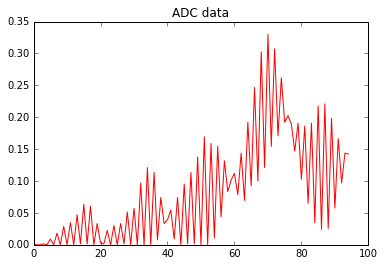

In [98]:
%matplotlib inline
from pynq.pmods import Grove_ADC
import time
import matplotlib.pyplot as plt

# initialize ADC on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 and GR3 can be used for the Grove ADC

grove_adc = Grove_ADC(1, 4)

# read current tension value and print it
value = grove_adc.read()
print("Current voltage: " + str(value) + "V")

# set logging interval
grove_adc.set_log_interval_ms(10)

# start logging
grove_adc.start_log()

# wait for 1 second...
time.sleep(1)

# get and stop logging
values = grove_adc.get_log()
print("Voltage values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('ADC data')
plt.show()

### Analog sensors connected via Diligent ADC AD2 (SPI)

This exampe applies to the following sensors connected via the [Diligent ADC AD2](https://reference.digilentinc.com/_media/pmod:pmod:pmodAD2_rm.pdf)
* [Light sensor](http://www.seeedstudio.com/wiki/Grove_-_IMU_9DOF)
* [Gas O2 sensor](http://www.seeedstudio.com/wiki/Grove_-_Gas_Sensor%28O%E2%82%82%29)
* [Loudness sensor](http://www.seeedstudio.com/wiki/Grove_-_Loudness_Sensor)
* [EMG detector](http://www.seeedstudio.com/wiki/Grove_-_EMG_Detector)
* [GSR sensor](http://www.seeedstudio.com/wiki/Grove_-_GSR_Sensor)

The DAC AD2 has 4 input channels (V1, V2, V3, V4) with a 12 bit resolution.
However, only the first 3 channels (V1, V2, V3) can be used due to jumper JP1 setting that **MUST** be positioned on **REF**.

Sensor connection (3 cables required):
<img src="img/pmod-ad2-cables.jpg" style="width:400px"/>

Current voltage: 0.0234V
Voltage values: [1.8418, 1.8105, 1.7793, 1.7773, 1.8105, 1.8418, 1.8428, 1.8115, 1.7793, 1.7773, 1.7793, 1.8105, 1.8418, 1.8115, 1.8105, 1.7773, 1.7793, 1.8105, 1.8418, 1.8418, 1.8105, 1.7793, 1.7773, 1.8105, 1.8418, 1.8418, 1.8105, 1.7793, 1.7773, 1.8086, 1.8115, 1.8428, 1.8115, 1.8086, 1.7773, 1.7793, 1.8105, 1.812, 1.8105, 1.7617, 1.6836, 1.6245, 1.6855, 1.7168, 1.6865, 1.6543, 1.5918, 1.5605, 1.5615, 1.623, 1.6543, 1.5605, 1.5117, 1.4355, 1.4648, 1.5117, 1.5293, 1.5273, 1.5117, 1.4648, 1.5117, 1.5273, 1.5605, 1.5586, 1.5273, 1.5117, 1.5117, 1.5273, 1.5605, 1.5605, 1.5293, 1.5117, 1.5117, 1.5273, 1.5586, 1.5605, 1.5293, 1.5117, 1.4648, 1.5117, 1.5273, 1.5273, 1.4355, 1.3711, 1.3086, 1.3086, 1.3115]


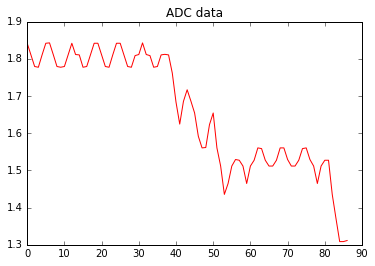

In [4]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
import time
import matplotlib.pyplot as plt

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(1)

# read the tension value for V1 (V1 -> 0) and print it
value = pmod_adc.read(0)
print("Current voltage: " + str(value) + "V")

# start logging on V3 (V3 -> 2) with log interval of 10 ms
# NOTE: the current driver allows to log only one input at a time,
# to get data from multiple inputs at the same time you need to get them manually within a loop
pmod_adc.start_log(2, 10)

# wait for 1 second...
time.sleep(1)

# get and stop logging
values = pmod_adc.get_log()
print("Voltage values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('ADC data')
plt.show()

### Grove IMU 10DOF

[Sensor documentation](http://www.seeedstudio.com/wiki/Grove_-_IMU_10DOF)
<br/>
Sensor connection via StickIt:
<img src="img/imu.jpg" style="width:400px"/>

<br/>
Sensor connection via cables (4 cables needed):
<img src="img/imu-cable.jpg" style="width:400px"/>

In [1]:
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets

# initialize Grove IMU on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(1,4)

while(True):
    try:

        # get data from accelerometer
        accl = imu.get_accl()
        
        # get data from gyroscope
        gyro = imu.get_gyro()

        # get data from compass
        compass = imu.get_compass()
        
        # get temperature
        temperature = imu.get_temperature()

        # get pressure in Pa
        pressure = imu.get_pressure()

        # get altitude (this is derived from pressure)
        altitude = imu.get_altitude()
            
        # clear screen and display new values
        display.clear_output(wait=True)

        print("Accelerometer x: " + str(accl[0]))
        print("Accelerometer y: " + str(accl[1]))
        print("Accelerometer z: " + str(accl[2]))
        print("")
        print("Gyroscope x: " + str(gyro[0]))
        print("Gyroscope y: " + str(gyro[1]))
        print("Gyroscope z: " + str(gyro[2]))
        print("")
        print("Compass x: " + str(compass[0]))
        print("Compass y: " + str(compass[1]))
        print("Compass z: " + str(compass[2]))
        print("")
        print("temperature: " + str(temperature))
        print("pressure: " + str(pressure))
        print("altitude: " + str(altitude))

    except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
        break

Accelerometer x: -0.99
Accelerometer y: -0.12
Accelerometer z: -0.0

Gyroscope x: 1.01
Gyroscope y: 0.53
Gyroscope z: 2.41

Compass x: -14.94
Compass y: 41.6
Compass z: 19.04

temperature: 27.3
pressure: 100060.0
altitude: 105.53


In order to take advantage of the additonal method **get_motion** which provides accelerometer and gyroscope information in a single call with much higher sampling rate, you may need to install the extra drivers following these steps:

* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.


In [12]:
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets
import time

# initialize Grove IMU on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(1,4)

directions = ["X", "Y", "Z"]
acclBars = []
gyroBars = []
for d in directions:
    bar = widgets.FloatSlider(min=-2, max=2, description="Accelerometer " + d)
    acclBars.append(bar)
    display.display(bar)
for d in directions:
    bar = widgets.FloatSlider(min=-250, max=250, description="Gyroscope " + d)
    gyroBars.append(bar)
    display.display(bar)

gyroBars[0].margin = "20px 0px 0px 0px"
    
while(True):
    try:

        # get data from accelerometer
        motion = imu.get_motion()
        
        accl = (motion[0], motion[1], motion[2])
        gyro = (motion[3], motion[4], motion[5])
            
        for i in range(3):
            acclBars[i].value = accl[i]
        for i in range(3):
            gyroBars[i].value = gyro[i]

    except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
        break

### Ambient light sensor

[Sensor documentation](https://reference.digilentinc.com/_media/pmod:pmod:pmodALS_rm.pdf)

The sensor must be connected using the **top socket pins** of the PMOD connector as shown in the figure:

<img src="img/pmod-als.jpg" style="width:400px"/>

Light value: 25
Light values: [31, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 4, 3, 6, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 17, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]


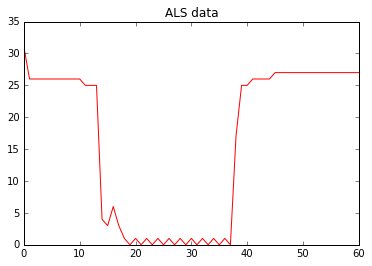

In [14]:
%matplotlib inline
from pynq.pmods import PMOD_ALS
import time
import matplotlib.pyplot as plt

# initialize ALS on PMOD 1 (JB).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

pmod_als = PMOD_ALS(1)

# read current light value and print it
value = pmod_als.read()
print("Light value: " + str(value))

# set logging interval
pmod_als.set_log_interval_ms(50)

# start logging
pmod_als.start_log()

# wait for 3 seconds...
time.sleep(3)

# get and stop logging
values = pmod_als.get_log()
print("Light values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('ALS data')
plt.show()

### Temperature TMP2

[Sensor documentation](https://reference.digilentinc.com/_media/pmod:pmod:pmodTMP2_rm.pdf)

The sensor must be connected using the **left socket pins** of the PMOD connector as shown in the figure:

<img src="img/pmod-tmp2.jpg" style="width:400px"/>

Light value: 28.1
Light values: [28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.2, 28.2, 28.2, 28.2, 28.2, 28.4, 28.4, 28.4, 28.4, 28.4, 28.6, 28.6, 28.6, 28.6, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.8, 28.9, 28.9, 28.9]


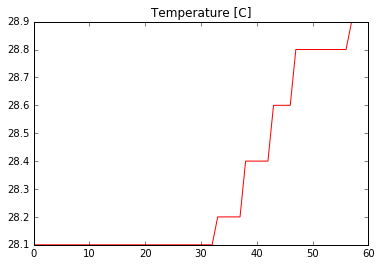

In [3]:
%matplotlib inline
from pynq.pmods import PMOD_TMP2
import time
import matplotlib.pyplot as plt

# initialize TMP2 on PMOD 1 (JB).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

pmod_tmp2 = PMOD_TMP2(1)

# read current temperature value and print it
value = pmod_tmp2.read()
print("Light value: " + str(value))

# set logging interval
pmod_tmp2.set_log_interval_ms(50)

# start logging
pmod_tmp2.start_log()

# wait for 3 seconds...
time.sleep(3)

# get and stop logging
values = pmod_tmp2.get_log()
print("Light values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('Temperature [C]')
plt.show()

### Grove Color Sensor

[Sensor documentation](http://www.seeedstudio.com/wiki/Grove_-_Finger-clip_Heart_Rate_Sensor)
<br/>
Sensor connection via StickIt:
<img src="img/color.jpg" style="width:400px"/>

<br/>
Sensor connection via cables (4 cables needed):
<img src="img/color-cables.jpg" style="width:400px"/>

The driver for this sensor might not be present on your board.
In order to install the driver follows these steps:
* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.


Red: 1298
Green: 945
Blue: 495
Clear: 2643
Color values: [(1307, 950, 496, 2653), (1305, 937, 501, 2643), (1269, 928, 499, 2666), (1255, 922, 490, 2637), (1247, 925, 486, 2619), (1264, 931, 482, 2564), (1271, 919, 485, 2572), (1263, 913, 489, 2603), (1237, 907, 489, 2614), (1237, 916, 486, 2620), (1255, 920, 482, 2579), (1259, 928, 482, 2576), (1279, 923, 488, 2597), (1266, 918, 497, 2649), (1255, 923, 494, 2656), (1251, 926, 491, 2610), (1276, 938, 491, 2640), (1315, 943, 500, 2664), (1310, 951, 510, 2707), (1311, 944, 511, 2733), (1290, 947, 505, 2720), (1307, 956, 503, 2719), (1338, 974, 512, 2732), (1360, 972, 514, 2759), (1363, 967, 527, 2798), (1320, 971, 509, 2690), (1125, 918, 455, 2389), (815, 969, 392, 2064), (641, 1034, 374, 1994), (629, 1040, 382, 2051), (642, 1070, 390, 2116), (631, 1079, 390, 2115), (634, 1089, 389, 2114), (651, 1107, 393, 2105), (659, 1118, 396, 2133), (657, 1107, 398, 2127), (642, 1098, 398, 2152), (641, 1099, 394, 2133), (638, 1102, 391, 2098), (652, 1

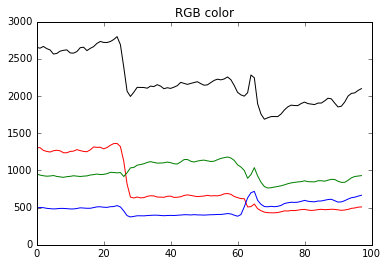

In [32]:
%matplotlib inline
from pynq.pmods import Grove_Color
import time
import matplotlib.pyplot as plt

# initialize Color sensor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 and GR3 can be used for the Color sensor

grove_color = Grove_Color(1, 1)

# read current color values
value = grove_color.read()
print("Red: " + str(value[0]))
print("Green: " + str(value[1]))
print("Blue: " + str(value[2]))
print("Clear: " + str(value[3]))

# start logging a with log interval of 100 ms
# this sensor does not support logging with a time period smaller than 100ms
grove_color.start_log(100)

# wait for 5 seconds...
time.sleep(5)

# get and stop logging
values = grove_color.get_log()
print("Color values: " + str(values))

# draw graph showing all the color components
plt.plot(range(len(values)), [v[0] for v in values], 'r')
plt.plot(range(len(values)), [v[1] for v in values], 'g')
plt.plot(range(len(values)), [v[2] for v in values], 'b')
plt.plot(range(len(values)), [v[3] for v in values], 'k')
plt.title('RGB color')
plt.show()


### Grove Finger Clip Heart Rate Sensor

[Sensor documentation](http://www.seeedstudio.com/wiki/Grove_-_Finger-clip_Heart_Rate_Sensor)
<br/>
Sensor connection via StickIt:
<img src="img/finger-clip-hr.jpg" style="width:400px"/>

<br/>
Sensor connection via cables (4 cables needed):
<img src="img/finger-clip-hr-cables.jpg" style="width:400px"/>

The driver for this sensor might not be present on your board.
In order to install the driver follows these steps:
* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.
Notice that in order to obtain valid heart rates the finger should be placed on the sensor for at least 30 seconds.


In [49]:
%matplotlib inline
from pynq.pmods import Grove_FingerHR
import time
import matplotlib.pyplot as plt
from IPython import display

# initialize finger clip heart rate sensor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

fingerHR = Grove_FingerHR(1, 4)

# NOTE:
# if you need to perform asynchronous logging use:
# - fingerHR.start_log(ms) - where ms is the logging interval in ms
# - fingerHR.get_log() - to get the result and stop logging

# read heart rate
while(True):
    try:
        value = fingerHR.read()
        display.clear_output(wait=True)
        print(str(value) + " heart beats per minute")
        time.sleep(0.5)
    except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
        break

53 heart beats per minute


### Grove Haptic Motor

[Device documentation](http://www.seeedstudio.com/wiki/Grove_-_Haptic_Motor)
<br/>
Device connection via StickIt:
<img src="img/haptic-motor.jpg" style="width:400px"/>

<br/>
Device connection via cables (4 cables needed):
<img src="img/haptic-motor-cables.jpg" style="width:400px"/>

The driver for this device might not be present on your board.
In order to install the driver follows these steps:
* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.


In [9]:
from pynq.pmods import Grove_Haptic_Motor
import time
from IPython import display

# initialize haptic motor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

hapticMotor = Grove_Haptic_Motor(1, 4)

# play vibration effect 7
hapticMotor.play(7)

# sleep for a second
time.sleep(1)

# play the sequence: effect 70, pause 1000 (|-100|*10), effect 40 and effect 23
hapticMotor.play_sequence([70,-100,40,10])

# monitor the status of the haptic motor
while(hapticMotor.is_playing()):
    print("motor playing...")
    time.sleep(0.2)
print("sequence completed!")

motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
motor playing...
sequence completed!


### Grove Ear Clip Heart Rate Sensor
[Sensor documentation](http://www.seeedstudio.com/wiki/Grove_-_Ear-clip_Heart_Rate_Sensor)
<br/>
Sensor connection via StickIt:
<img src="img/ear-clip.jpg" style="width:400px"/>

<br/>
Sensor connection via cables (3 cables needed):
<img src="img/ear-clip-cables.jpg" style="width:400px"/>

The driver for this device might not be present on your board.
In order to install the driver follows these steps:
* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.

In [5]:
%matplotlib inline
from pynq.pmods import Grove_EarHR
from pynq.board import LED
import time
import matplotlib.pyplot as plt
from IPython import display

# initialize ear clip heart rate sensor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

earHR = Grove_EarHR(1, 4)

# set up led for showing heart beats
led = LED(0)
led.off()

# read initial number of heart beats
beats, deltaT = earHR.read_raw()
oldBeats = beats

while(True):
    try:
        beats, deltaT = earHR.read_raw()
        if(oldBeats == beats):
            # same number of heart beats as previous iteration
            led.off()
        else:
            # new heart beat detected!
            led.on()
        
        oldBeats = beats
        rate = earHR.read()
        
        display.clear_output(wait=True)
        print("Number of heart beats: " + str(beats))
        print("Heart beat frequency: " + str(round(rate,2)) + " beats per minute")
        
        time.sleep(0.1)
    except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
        break


Number of heart beats: 142
Heart beat frequency: 59.23 beats per minute


### Grove Temperature & Humidity (Mini)	

[Sensor documentation](http://www.seeedstudio.com/wiki/Grove_-_Finger-clip_Heart_Rate_Sensor)
<br/>
Sensor connection via StickIt:
<img src="img/th-mini.jpg" style="width:400px"/>

<br/>
Sensor connection via cables (4 cables needed):
<img src="img/th-mini-cables.jpg" style="width:400px"/>

The driver for this sensor might not be present on your board.
In order to install the driver follows these steps:
* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.

Temperature: 25.28125
Humidity: 25.28125


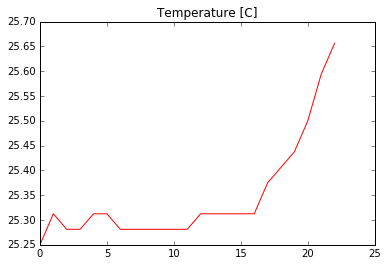

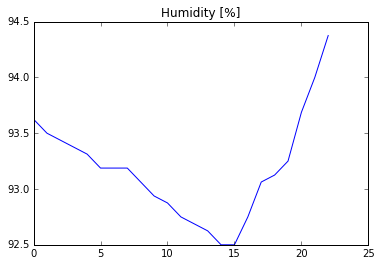

In [14]:
%matplotlib inline
from pynq.pmods import Grove_TH02
import time
import matplotlib.pyplot as plt

# initialize grove TH02 sensor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

th02 = Grove_TH02(1,4)

# read current temperature and humidity values and print them
tmp, humi = th02.read()
print("Temperature: " + str(tmp))
print("Humidity: " + str(tmp))

# start logging
sampling_rate_ms = 50
th02.start_log(sampling_rate_ms)

# wait for 3 seconds...
time.sleep(3)

# get and stop logging
values = th02.get_log()

# draw graphs
tmp_vals = [v[0] for v in values]
humi_vals = [v[1] for v in values]

plt.plot(range(len(tmp_vals)), tmp_vals, 'r')
plt.title('Temperature [C]')
plt.show()

plt.figure(1)
plt.plot(range(len(tmp_vals)), humi_vals, 'b')
plt.title('Humidity [%]')
plt.show()

### Grove Digital Light Sensor

[Sensor documentation](http://www.seeedstudio.com/wiki/Grove_-_Digital_Light_Sensor)
<br/>
Sensor connection via StickIt:
<img src="img/grove-dlight.jpg" style="width:400px"/>

<br/>
Sensor connection via cables (4 cables needed):
<img src="img/grove-dlight-cables.jpg" style="width:400px"/>

The driver for this sensor might not be present on your board.
In order to install the driver follows these steps:
* Download the extra drivers archive by [clicking here](http://xph.necst.it/2016/hardware/extra-drivers.tar)
* Access the board xpp disk from your system
* Copy the archive directly within the xpp drive (not within a subfolder)
* Execute the following code from Jupyter (the Jupyter of your board... NOT your local Jupyter!)

In [ ]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

* Close and re-open Jupyter

Once the driver has been installed, test the sensor with the following code.

samples: 112
sampling time: 4.008211612701416
sampling frequency: 27.94263647285711
time step: 35.787603684834075
[258, 257, 257, 265, 268, 267, 268, 256, 257, 258, 263, 256, 264, 270, 256, 271, 260, 260, 259, 261, 256, 256, 270, 262, 256, 260, 256, 270, 268, 262, 270, 265, 267, 269, 0, 6, 10, 6, 3, 4, 1, 2, 0, 1, 1, 0, 0, 14, 15, 14, 14, 13, 13, 15, 13, 14, 13, 14, 15, 14, 14, 14, 3, 5, 256, 261, 266, 270, 256, 264, 269, 266, 269, 257, 257, 260, 263, 258, 264, 256, 256, 256, 261, 260, 260, 261, 257, 256, 270, 263, 256, 263, 259, 257, 256, 267, 266, 269, 266, 257, 257, 257, 265, 269, 266, 268, 256, 256, 259, 262, 257, 263]


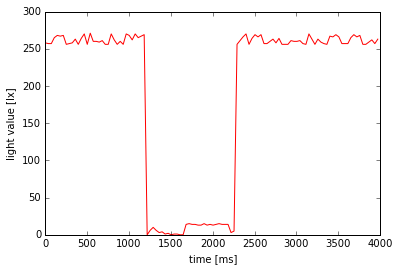

In [3]:
%matplotlib inline
from pynq.pmods import Grove_DLight
import time
import matplotlib.pyplot as plt
import numpy as np

# initialize grove digital light sensor on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

dl = Grove_DLight(1,4)

# perform logging directly from Python using a while loop
values = []
sampling_time = 4
start = time.time();
end = start

while(end - start < sampling_time):
    value = dl.read_raw_light()
    values.append(value[0])
    end = time.time()

num_samples = len(values)
sampling_time = end - start
sampling_freq = num_samples / sampling_time
time_step_ms = (1 / sampling_freq) * 1000

print("samples: " + str(num_samples))
print("sampling time: " + str(sampling_time))
print("sampling frequency: " + str(sampling_freq))
print("time step: " + str(time_step_ms))

# draw graph
time = np.arange(num_samples) * time_step_ms
print(values)
plt.plot(time, values, 'r')
plt.ylabel("light value [lx]")
plt.xlabel("time [ms]")
plt.show()